Legend:

**ID - Name - Description**

0 - **VWTI** - Variance of Wavelet Transformed Image;

1 - **SWTI** - Skewness of Wavelet Transform Image;

2 - **KWTI** - Kurtosis Wavelet Transform Image;

3 - **EI** - Entropy of Image;

4 - **Class** - Class.

# 1. Importing packages

In [17]:
## Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import seaborn as sns

from mydatasetpackage import MyDataset
from mydatasetpackage import grid_plot
from mydatasetpackage import scatter_plot

# 2. Loading dataset

In [18]:
## Filename and path
dataset_path = 'D:\\Datasets\\UCI_Banknote_Authentication'
filename = 'data_banknote_authentication.txt'

## Loading dataset
dataset = MyDataset(dataset_path, filename)
data = dataset.load_txt()

data_banknote_authentication.txt dataset was loaded!
(1372, 5)


In [19]:
## Change header
header = ['VWTI', 'SWTI', 'KWTI', 'EI', 'Class']
data = dataset.change_header(header)
data.head()

,VWTI,SWTI,KWTI,EI,Class
0,3.62160,8.6661,-2.8073,-0.44699,0.0
1,4.54590,8.1674,-2.4586,-1.46210,0.0
2,3.86600,-2.6383,1.9242,0.10645,0.0
3,3.45660,9.5228,-4.0112,-3.59440,0.0
4,0.32924,-4.4552,4.5718,-0.98880,0.0


In [20]:
data.describe()

,VWTI,SWTI,KWTI,EI,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [21]:
## Separating data and class
class_column = 4
X, y = dataset.separate_data_and_target(class_column)

Input data: (1372, 4) - Output class: (1372,)


## 2.1 Analysis and Preprocessing

In [22]:
dataset.check_nan()

Number of NaN values
            VWTI  SWTI  KWTI  EI  Class
NaN Values     0     0     0   0      0


In [23]:
dataset.check_null()

Number of Null values
             VWTI  SWTI  KWTI  EI  Class
Null Values     0     0     0   0      0


                          VWTI      SWTI       KWTI         EI  Class
1st Quartile         -1.773000 -1.708200  -1.574975  -2.413450    0.0
Median                0.496180  2.319650   0.616630  -0.586650    0.0
3rd Quartile          2.821475  6.814625   3.179250   0.394810    1.0
Under Lower Bound     0.000000  0.000000   0.000000  33.000000    0.0
Above Upper Bound     0.000000  0.000000  59.000000   0.000000    0.0
Total Outliers (abs)  0.000000  0.000000  59.000000  33.000000    0.0
Total Outliers (%)    0.000000  0.000000   0.043003   0.024052    0.0


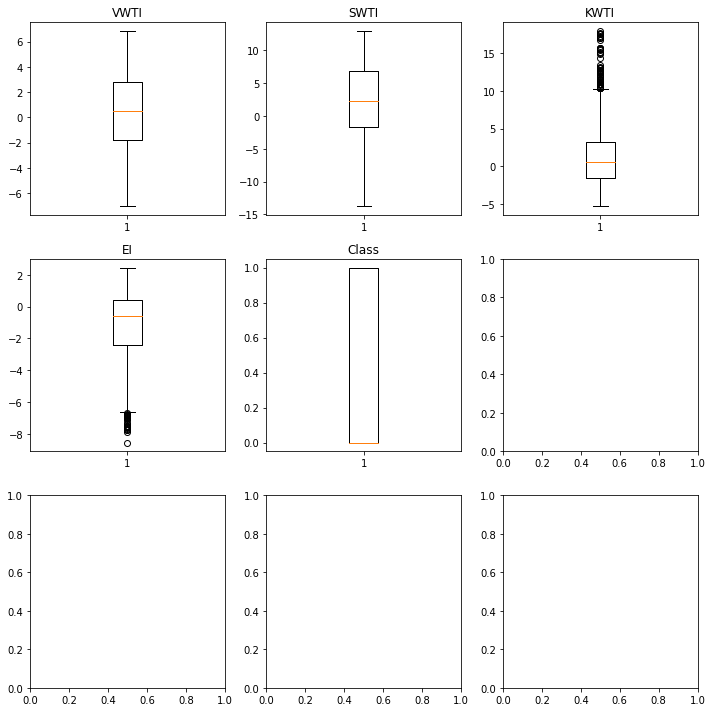

In [24]:
dataset.check_outliers(flag_plots=True)

In [25]:
no_outliers_data = dataset.remove_outliers()

Dataset without outliers shape: (1280, 5)
Reduced from  (1372, 5)  to  (1280, 5) [- 0.067 %]


In [26]:
Xpreprocessed, ypreprocessed = dataset.separate_data_and_target(class_column)

Input data: (1280, 4) - Output class: (1280,)


In [27]:
# del data, no_outliers_data

## 2.2 Visualization

In [28]:
data[data.columns[0]][y==0]

0      3.62160
1      4.54590
2      3.86600
3      3.45660
4      0.32924
        ...   
757    2.66060
758    3.93100
759    0.01727
760    3.24140
761    2.25040
Name: VWTI, Length: 762, dtype: float64

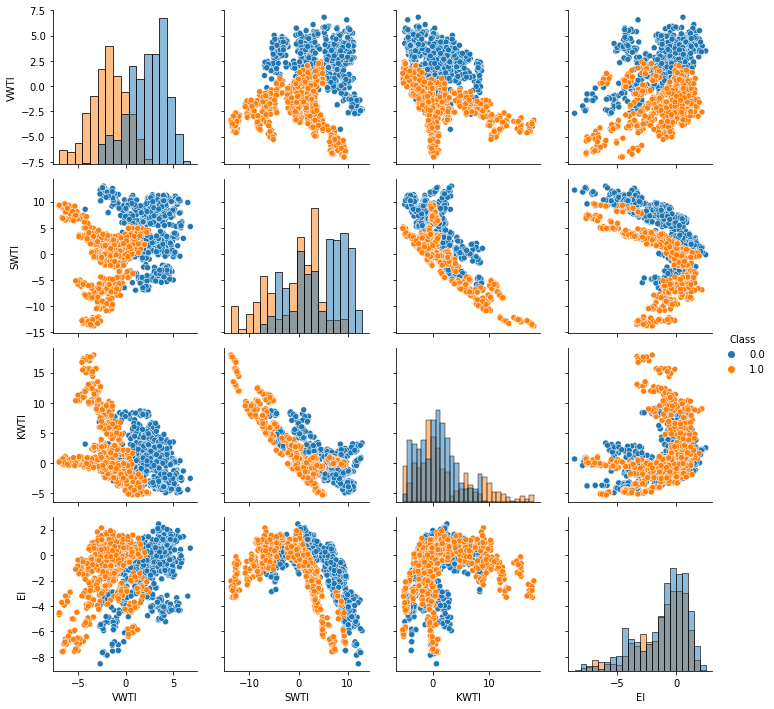

In [29]:
grid_plot(data, 'Class')

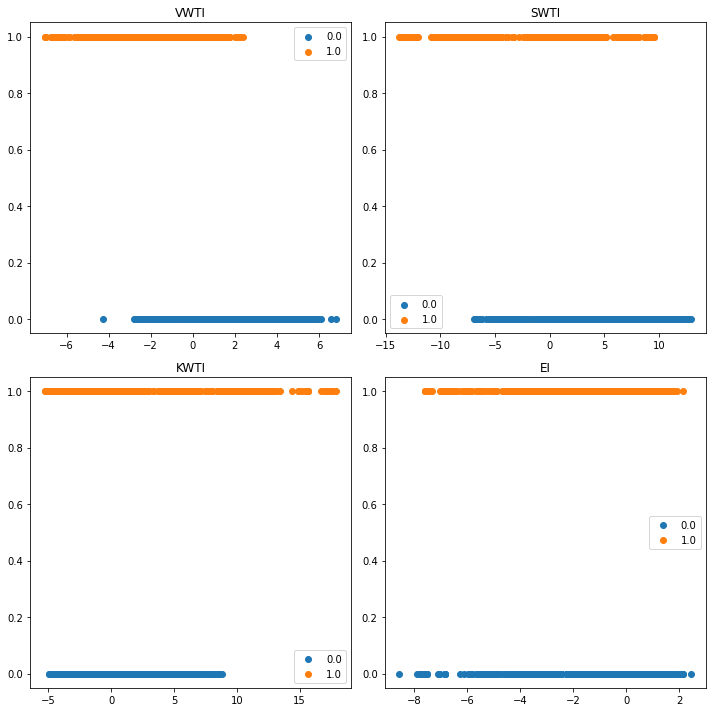

In [30]:
scatter_plot(X, y, (10,10))

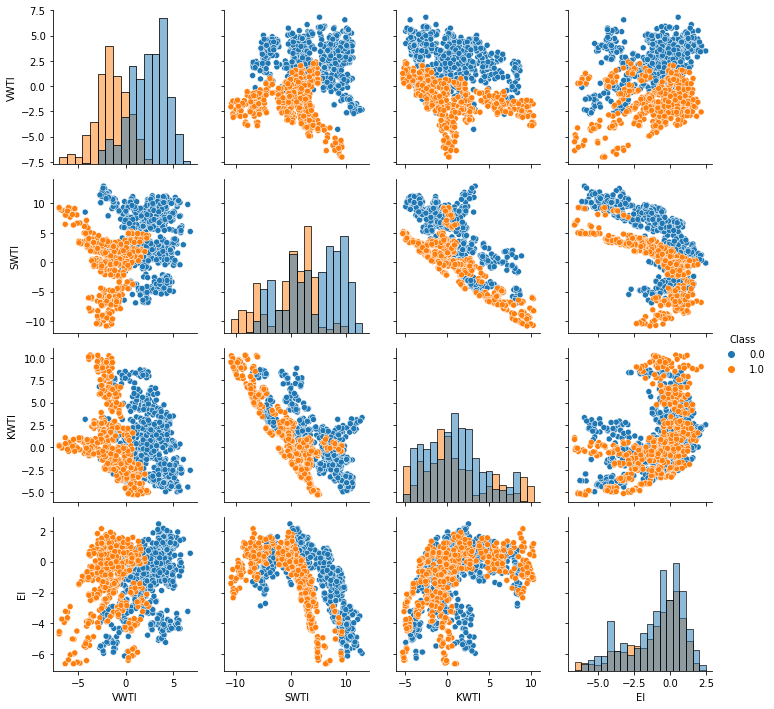

In [31]:
grid_plot(no_outliers_data, 'Class')

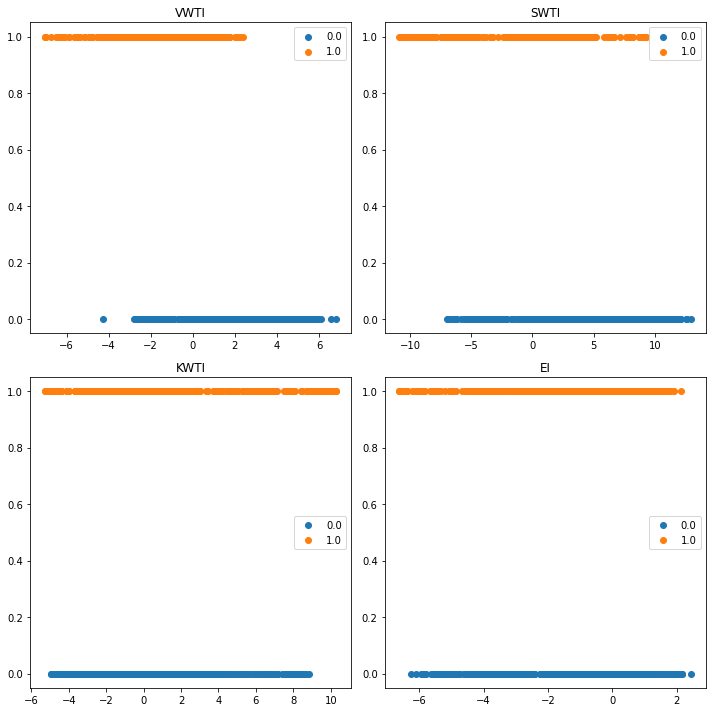

In [32]:
scatter_plot(Xpreprocessed, ypreprocessed, (10,10))